# Experiment 4
## Group -5

<u><h2>The data files</h2></u>
<ul>
  <li>The data are presented in a header-less (numeric data only without any descriptive text), ASCII format file.</li>
  <li>The file has two columns of integer values, separated by a space.</li>
  <li>The links for the data are given below. You may pick any one of the following for analysis.</li>
  <ul>
  <li><a href="http://repository.iucaa.in:8080/jspui/bitstream/11007/4565/1/ch00_B0833-45_20150612_191438_011_1.txt" target="_blank">Data file 1</a></li>
  <li><a href="http://repository.iucaa.in:8080/jspui/bitstream/11007/4565/2/ch00_B0833-45_20150612_191438_011_2.txt" target="_blank">Data file 2</a></li>
  <li><a href="http://repository.iucaa.in:8080/jspui/bitstream/11007/4565/3/ch00_B0833-45_20150612_191438_011_3.txt" target="_blank">Data file 3</a></li>
  <li><a href="http://repository.iucaa.in:8080/jspui/bitstream/11007/4565/7/ch00_B0833-45_20150612_191438_010_4.txt" target="_blank">Data file 4</a></li>
  </ul>
</ul>


<u><h3>Description of the data:</h3></u>
<ul>
  <li>Voltage time series from the Ooty Radio Telescope (ORT) &mdash; North and South apertures</li>
  <li>As raw voltages, the data are in arbitrary units</li>
  <li>The observation frequency is $326.5\pm8.25$ MHz which has been down-converted to the base band. The voltages hence occupy the $0-16.5$ MHz band.</li>
  <li>The data is sampled at the Nyquist rate, i.e., two real valued voltage measurements in a period corresponding to the maximum variability time-scale (maximum frequency). The time-resolution is, $$\delta t = \left(\frac{1}{2}\frac{1}{16.5 \text{MHz}}\right)\text{seconds}$$ </li>
  <li>The length of the data is about 1 second</li>
</ul>


We encourage you to explore the data on you own but here are a few ideas to guide you:
<u><h3>A few goals to get you started with this activity</h3></u>
<ul>
  <li>Visulaize the voltage time-series</li>
  <li>Plot and characterize the distribution of the telescope voltage data</li>
  <li>Visulaize the power time-series</li>
  <li>Plot and characterize the distribution of the power values</li>
  <li>Power Spectral Density: obtain the distribution of power in various frequency bins</li>
  <li>Dynamic spectrum: visualize the change in power spectral density as a function of time</li>
</ul>

<h3>Preliminaries</h3>
<p>This notebook assumes that the code is being executed on Google Colab using a hosted runtime. You are free to use a local editor and runtime or a different programming language altogether as you see fit.</p>
<ul>
  <li>Import necessary libraries</li>
  <li>Access and load the data file</li>
</ul>

<h4>Import libraries</h4>

In [ ]:
# General libraries for easy data manipulation
import os  
import math
import random
import numpy as np
import pandas as pd
# Scientific computing libraries
import scipy.constants as scp
import astropy.constants as asc
from scipy.stats import norm
# Plotting libraries and methods
import matplotlib.pyplot as plt
#<< Import more libraries as needed >>

<h3>Section 1: The voltage time series</h3>

In [ ]:
# useful parameters
delta_t = 1/(2*16.5e+6) # time step in seconds

# loading the data
data = pd.read_csv('ch00_B0833-45_20150612_191438_011_1.txt', delimiter=" ")

In [ ]:
# extracting the north and south antennae data
data_array = data.to_numpy()
north_antenna_voltages = data_array[:,0]
south_antenna_voltages = data_array[:,1]

# making time samples
time_samples = np.linspace(0, len(data_array)*delta_t, len(data_array))

<h4>1.1: Plot the voltages from North and South antennas as a function of time</h4>

<ul>
  <li>A simple matplotlib <a href="https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html" target="_blank">line</a> plot may be sufficient to visualize the time-series.</li>
  <li>Use libraries such as Seaborn or Bokeh for aesthetics</li>
  <li>Plot a small part of the time series too to zoom in on the variability time-scale</li>
</ul>

Text(0, 0.5, 'Voltage Amplitude')

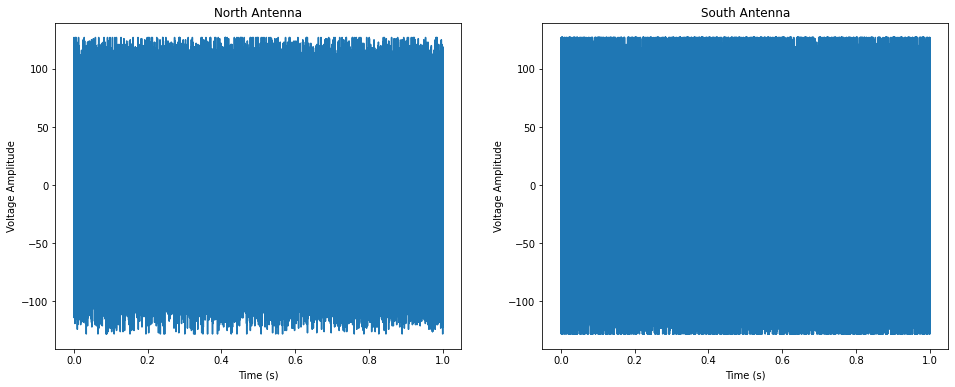

In [ ]:
# Plotting code for voltage time-series
fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].plot(time_samples, north_antenna_voltages)
ax[0].set_title('North Antenna')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Voltage Amplitude')

ax[1].plot(time_samples, south_antenna_voltages)
ax[1].set_title('South Antenna')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Voltage Amplitude')

Text(0, 0.5, 'Voltage Amplitude')

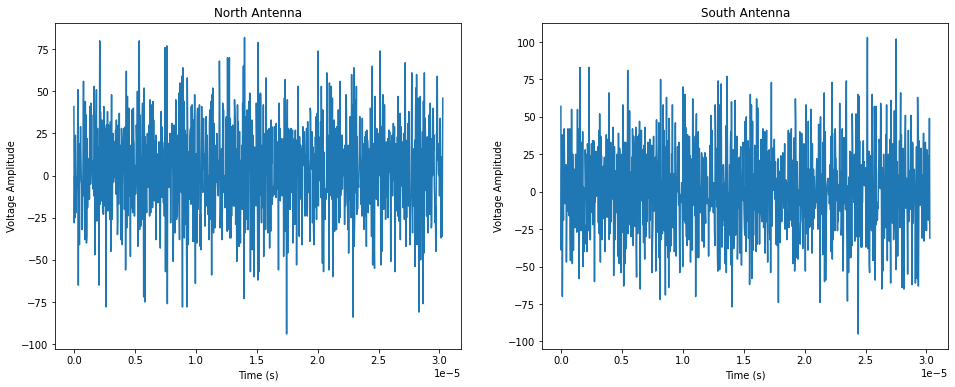

In [ ]:
# Plotting code for voltage time-series small part (for better visualization we use first 1000 samples)
fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].plot(time_samples[0:1000], north_antenna_voltages[0:1000])
ax[0].set_title('North Antenna')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Voltage Amplitude')

ax[1].plot(time_samples[0:1000], south_antenna_voltages[0:1000])
ax[1].set_title('South Antenna')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Voltage Amplitude')

<h4>1.2: Plot the voltage histograms for the two antennas</h4> 
<ul>
  <li>Use matplotlib <a href="https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html" target="_blank">plt.hist</a> for plotting histograms (<a href="https://www.geeksforgeeks.org/matplotlib-pyplot-hist-in-python/" target="_target">Example</a>)</li>
  <li>Obtain distribution parameters using numpy methods for <a href="https://numpy.org/doc/stable/reference/generated/numpy.mean.html" target="_target">mean</a> and <a href="https://numpy.org/doc/stable/reference/generated/numpy.std.html" target="_target">standard deviation</a></li>
  <li>Try plotting the probability density function from the measured distribution parameters</li>
  <li>Reference: <a href="https://www.cv.nrao.edu/~sransom/web/A2.html#S5" target="_blank">https://www.cv.nrao.edu/~sransom/web/A2.html#S5</a></li>
</ul>

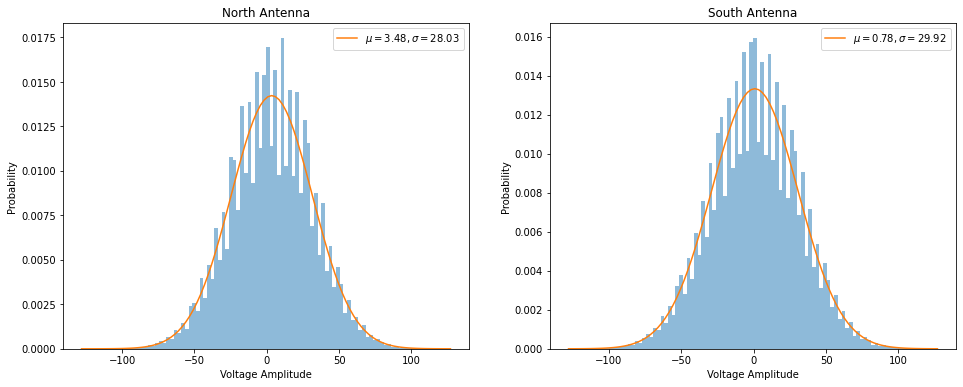

In [ ]:
# Gaussian Distribution
def gaussian(x, mean, sigma):
    return (np.exp(-(x - mean)**2 / (2 * sigma**2)) / (sigma * np.sqrt(2 * np.pi)))

# Plotting code for voltage distribution
fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].hist(north_antenna_voltages, bins=100, density = True, alpha = 0.5)
ax[0].set_title('North Antenna')
ax[0].set_xlabel('Voltage Amplitude')
ax[0].set_ylabel('Probability')
mean_north = np.mean(north_antenna_voltages)
std_north = np.std(north_antenna_voltages)
gauss_north_x = np.linspace(np.min(north_antenna_voltages), np.max(north_antenna_voltages), 100)
gauss_north_y = gaussian(gauss_north_x, mean_north, std_north)
ax[0].plot(gauss_north_x, gauss_north_y, label=f'$\mu = {round(mean_north,2)}, \sigma = {round(std_north,2)}$')
ax[0].legend()

ax[1].hist(south_antenna_voltages, bins=100, density = True, alpha = 0.5)
ax[1].set_title('South Antenna')
ax[1].set_xlabel('Voltage Amplitude')
ax[1].set_ylabel('Probability')
mean_south = np.mean(south_antenna_voltages)
std_south = np.std(south_antenna_voltages)
gauss_south_x = np.linspace(np.min(south_antenna_voltages), np.max(south_antenna_voltages), 100)
gauss_south_y = gaussian(gauss_south_x, mean_south, std_south)
ax[1].plot(gauss_south_x, gauss_south_y, label=f'$\mu = {round(mean_south,2)}, \sigma = {round(std_south,2)}$')
ax[1].legend()

<h3>Section 2: The power time series</h3>

<h4>2.1: Plot the power from North and South antennas as a function of time</h4>

<ul>
  <li>The power is obtained by squaring the voltages (use <a href="https://numpy.org/doc/stable/reference/generated/numpy.square.html" target="_blank">numpy square</a>)</li>
  <li>A simple matplotlib <a href="https://matplotlib.org/3.1.0/api/_as_gen/matplotlib.pyplot.plot.html" target="_blank">line</a> plot may be sufficient to visualize the time-series.</li>
  <li>Plot a small part of the time series too to zoom in on the variability time-scale</li>
</ul>

In [ ]:
# power calculation
north_antenna_power = np.square(north_antenna_voltages)
south_antenna_power = np.square(south_antenna_voltages)

Text(0, 0.5, 'Power Amplitude')

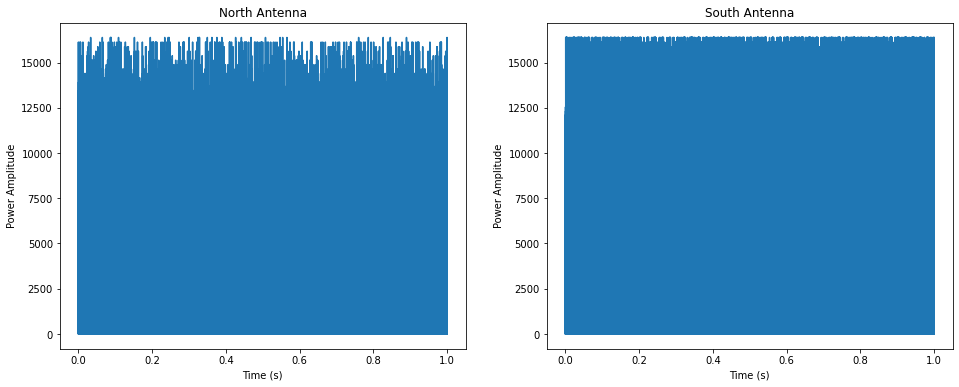

In [ ]:
# Plotting code for power time-series
fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].plot(time_samples, north_antenna_power)
ax[0].set_title('North Antenna')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Power Amplitude')

ax[1].plot(time_samples, south_antenna_power)
ax[1].set_title('South Antenna')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Power Amplitude')

Text(0, 0.5, 'Power Amplitude')

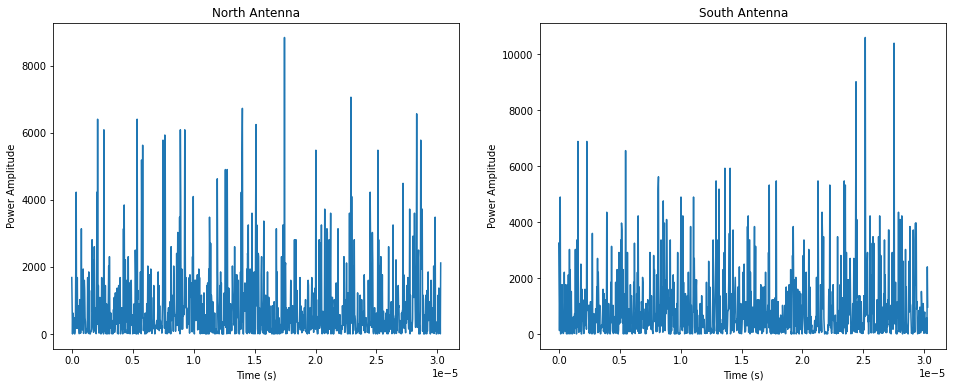

In [ ]:
# Plotting code for power time-series small part (for better visualization we use first 1000 samples)
fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].plot(time_samples[0:1000], north_antenna_power[0:1000])
ax[0].set_title('North Antenna')
ax[0].set_xlabel('Time (s)')
ax[0].set_ylabel('Power Amplitude')

ax[1].plot(time_samples[0:1000], south_antenna_power[0:1000])
ax[1].set_title('South Antenna')
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Power Amplitude')

<h4>2.2: Plot the power histograms for the two antennas</h4> 
<ul>
  <li>Use matplotlib <a href="https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.hist.html" target="_blank">plt.hist</a> for plotting histograms (<a href="https://www.geeksforgeeks.org/matplotlib-pyplot-hist-in-python/" target="_target">Example</a>)</li>
  <li>Plot the appropriate probability distribution function and find it's spread (<a href="https://www.cv.nrao.edu/~sransom/web/A2.html#S6" target="_blank">https://www.cv.nrao.edu/~sransom/web/A2.html#S6</a>)</li>
</ul>

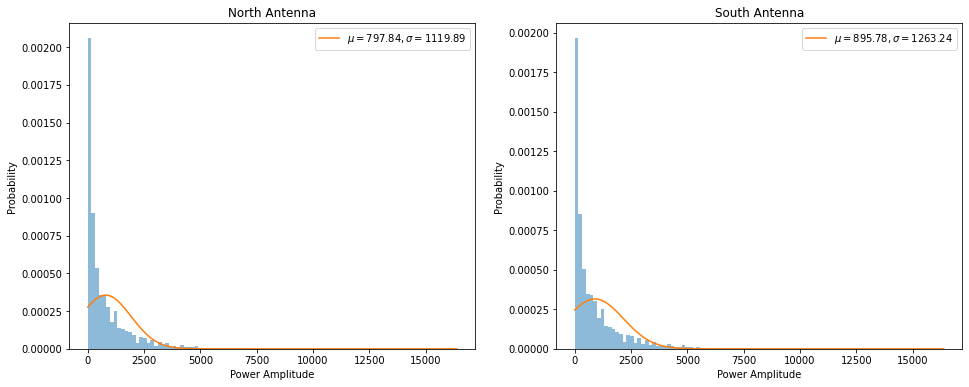

In [ ]:
# Plotting code for power distribution
fig, ax = plt.subplots(1,2, figsize=(16,6))
ax[0].hist(north_antenna_power, bins=100, density = True, alpha = 0.5)
ax[0].set_title('North Antenna')
ax[0].set_xlabel('Power Amplitude')
ax[0].set_ylabel('Probability')
mean_north_power,std_north_power = norm.fit(north_antenna_power)
gauss_north_x = np.linspace(np.min(north_antenna_power), np.max(north_antenna_power), 100)
gauss_north_y = gaussian(gauss_north_x, mean_north_power, std_north_power)
ax[0].plot(gauss_north_x, gauss_north_y, label=f'$\mu = {round(mean_north_power,2)}, \sigma = {round(std_north_power,2)}$')
ax[0].legend()

ax[1].hist(south_antenna_power, bins=100, density = True, alpha = 0.5)
ax[1].set_title('South Antenna')
ax[1].set_xlabel('Power Amplitude')
ax[1].set_ylabel('Probability')
mean_south_power, std_south_power  = norm.fit(south_antenna_power)
gauss_south_x = np.linspace(np.min(south_antenna_power), np.max(south_antenna_power), 100)
gauss_south_y = gaussian(gauss_south_x, mean_south_power, std_south_power)
ax[1].plot(gauss_south_x, gauss_south_y, label=f'$\mu = {round(mean_south_power,2)}, \sigma = {round(std_south_power,2)}$')
ax[1].legend()

<h3>Section 3: The Dynamic Spectrum</h3>
<ul>
  <li>Obtain the contribution of various frequencies that produce the voltage time-series &mdash; using a Fast Fourier Transform (FFT)</li>
  <li>A Fourier transform consists of the contributions from the constituent frequency which can be squared to give the power distribution</li>
  <li>Sequences of power spectra can be combined and added to reduce the statistical uncertainties</li>
  <li>A time-ordered series of spectra is referred to as the <em>Dynamic Spectrum</em></li>
</ul>

<h4>3.1: Choose frequency and time binning parameters</h4>
<ul>
  <li>First we want to obtain the spectral composition of the time series. In order to find the spectral information, we select a small part of the time-series, take the Fourier series to convert it to the spectrum in that time range.</li>
  <li>The spectral information is obtained at the cost of time resolution (since FFT of voltage time samples gives the spectrum)</li>
  <li>For time-resolution $dt$, an $N-$point FFT will output the amplitude and phase of $N/2$ frequencies that contains information equivalent to the time-series</li>
  <li>The data can now be transformed to a time series of time bin-size $N\times dt$ but with a $N/2$-bins spectrum in each time bin</li>
  <li>The power spectral distribution is obtained by squaring the Fourier spectrum</li>
</ul>

In [ ]:
# Frequency and time binning parameters
Nf =  256 # Number of frequency bins; Choose a power of 2: 2^n (E.g., 64, 128, 256)
print('Chosen number of frequency bins = {0}'.format(Nf))
fmax =  16.5e6 # Equals the bandwidth upper-limit of 16.5 MHz
print('Total bandwidth of signal = {0:.1f} MHz'.format(fmax/1e6))
dt =  1/(33e6) # Time resolution of 1/(33 MHz) seconds
print('Time-resolution of voltage sampling = {0:.2f} nanosecond'.format(dt*1e9))
# For chosen frequency resolution,
print('----------FFT length-----------') # FFT - Fast Fourier Transform
df =  16.5e6/Nf # Lowest frequency probed is equal to the chosen frequency resolution (Bandwidth by number of frequency bins).
print('Lowest frequency probed = {0:.2f} kHz'.format(df/1000))
Tmax =  1/df # Largest time-scale of variability probed is the inverse of the lowest frequency of interest.
print('Largest time-scale of variability = {0:.2f} microseconds'.format(Tmax*1e6))
Nfft =  int(Tmax/dt) # Number of voltage samples to obtain FFT is the number of voltage samples that span the largest time-scale (of interest / probed)
print('Number of voltage samples to obtain FFT = {0:d}'.format(Nfft))
Nspectra = int(len(data)/Nfft) # The spectral time series has a factor of 'Nfft' less time bins than the voltage data.
print('Number of spectra obtained through the {0}-point FFT = {1}'.format(Nfft, Nspectra))
print('Time-resolution of the spectral series = {0:.2f} microsecond'.format(Nfft*dt*1e6))

Chosen number of frequency bins = 256
Total bandwidth of signal = 16.5 MHz
Time-resolution of voltage sampling = 30.30 nanosecond
----------FFT length-----------
Lowest frequency probed = 64.45 kHz
Largest time-scale of variability = 15.52 microseconds
Number of voltage samples to obtain FFT = 512
Number of spectra obtained through the 512-point FFT = 64453
Time-resolution of the spectral series = 15.52 microsecond


<p>Consecutive spectra can be co-added in batches to reduce the statistical uncertainty in the power values and reduce the spectral array to a manageable size. This comes at the cost of time-resolution.</p>
(Do ensure that the final time-resolution is still at most 1 ms.)

In [ ]:
print('----------Time rebinning-----------')
Nint = 64 # Choose the number of consecutive spectral samples to be added
print('Number of spectra to add = {0}'.format(Nint))
print('Time-resolution of the co-added time series = {0} micro-second'.format(Nint*Nfft*dt*1e6))
print("Binned time-series has resolution > 1 ms. Choose a smaller number of spectra to average.") if (Nint*Nfft*dt*1e6 > 1000) else print("Binned time-series has resolution <= 1 ms")

----------Time rebinning-----------
Number of spectra to add = 64
Time-resolution of the co-added time series = 992.969696969697 micro-second
Binned time-series has resolution <= 1 ms


In [ ]:
def figure_out_power_spectrum(data):
    fft_data = np.fft.fft(data)
    fft_conjugate = np.conj(fft_data)
    power_spectrum = fft_data * fft_conjugate
    return power_spectrum   

def mean_power_spectrum(data):
    s = figure_out_power_spectrum(data[0:Nfft])
    for i in range(1, Nspectra):
        s += figure_out_power_spectrum(data[i*Nfft:(i+1)*Nfft])
    return (s/Nspectra)[1:]

def plot_mean_power_spectrum(data):
    s = mean_power_spectrum(data)[1:(Nfft//2)]
    plt.plot(range(len(s)), np.abs(s))
    plt.xlabel('Channel')
    plt.ylabel('Power Amplitude')
    plt.title('Mean Power Spectrum')

def plot_dynamic_spectrum(data, text):
    z_list = [figure_out_power_spectrum(data[i*Nfft:(i+1)*Nfft])[1:(Nfft//2)] for i in range(Nspectra)]
    z_grid_values = np.abs(np.transpose(np.array(z_list)))
    plt.title(text)
    plt.xlabel('Time')
    plt.ylabel('Channel')
    a = plt.imshow(z_grid_values, cmap = 'viridis', aspect = 'auto')
    plt.colorbar(a, location='right')
    plt.clim(0,1e9)

<h4>3.2: Convert voltage time-series to dynamic spectrum (spectral time-series)</h4>
<ul>
  <li>Re-group the voltage time-series into sections of <em>Nfft</em> points each</li>
  <li>Take the Fourier transform of every section of the time-series containting <em>Nfft</em> points</li>
  <li>Convert to power by taking the absolute value square of the complex spectral amplitudes</li>
  <li>Obtain the total power for the <em>Nint</em> spectral samples</li>
</ul>

<p>A simple way of grouping within an array and applying commands to the groups is using numpy method <a href="https://numpy.org/doc/stable/reference/generated/numpy.reshape.html" target="_blank">np.reshape</a> followed by the operation one intends to perform, <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft.html" target="_blank">np.fft.rfft</a> (for real-valued time-series) in our case.</p> The list of frequencies can be obtained using the <a href="https://numpy.org/doc/stable/reference/generated/numpy.fft.rfftfreq.html" target="_blank">np.fft.rfftfreq</a> method.
<p>Follow-up the FFT with taking the absolute value (<a href="https://numpy.org/doc/stable/reference/generated/numpy.absolute.html" target="_blank">np.abs</a>) of the complex amplitudes and squaring them (<a href="https://numpy.org/doc/stable/reference/generated/numpy.square.html" target="_blank">np.square</a>).</p>

<h4>3.3: Plot the dynamic spectrum considering only positive frequencies</h4>
<p>Use either <a href="https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.imshow.html" target="_blank">plt.imshow</a> or <a href="https://www.geeksforgeeks.org/matplotlib-pyplot-pcolormesh-in-python/?ref=lbp" target="_blank">plt.pcolormesh</a> to plot the dynamic spectrum.</p>
<p>Make sure that you label the time and frequency axes appropriately</p>
<p>Caution: <em>imshow</em> and <em>pcolormesh</em> use different locations for the origin in the plot, see <a href="https://thomas-cokelaer.info/blog/2014/05/matplotlib-difference-between-pcolor-pcolormesh-and-imshow/" target="_blank">this post</a>.

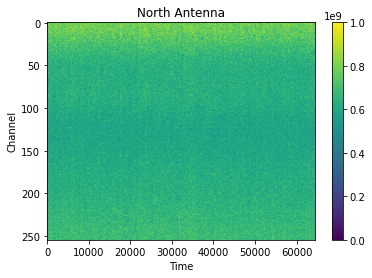

In [ ]:
plot_dynamic_spectrum(north_antenna_power, 'North Antenna')

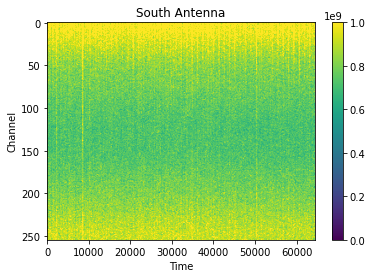

In [ ]:
plot_dynamic_spectrum(south_antenna_power, 'South Antenna')

<h4>-.-: A consistency check</h4>
<p>The dynamic spectrum will show the presence of any signal above the average noise level along with its frequency dependence and temporal variation.</p>
<p>Often times the spectrum is flipped in the telescope backend and hence the data shows the spectrum in reverse.</p>
<p>In our data, you should be able to see a periodically emitting source with emission over the bulk of the frequency range.<p>
<p>Interstellar dispersion introduces delays at lower-frequencies compared to higher frequencies which should be visible as systematically delayed signal from higher to lower frequencies.</p>
<p>If you see a reversed pattern the spectrum maybe flipped, assuming your plotting of the data is in the correct order. In which case, you will have to flip all the spectra in the time series in your dynamic spectrum array.</p>

<h4>3.4: The Power Spectral Density</h4>
<p>The power spectral density of the entire data can be visualized by averaging the spectra over the entire time-series</p>


Text(0.5, 1.0, 'Mean Power Spectrum for North Antenna')

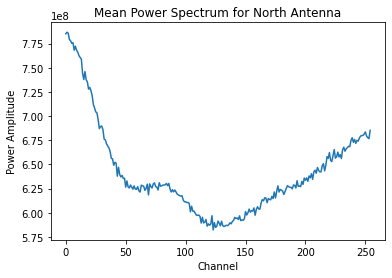

In [ ]:
plot_mean_power_spectrum(north_antenna_power)
plt.title('Mean Power Spectrum for North Antenna')

Text(0.5, 1.0, 'Mean Power Spectrum for South Antenna')

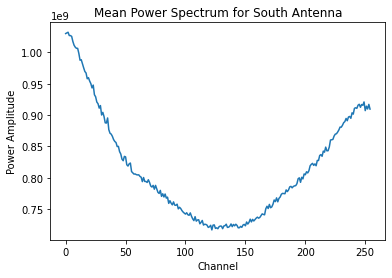

In [ ]:
plot_mean_power_spectrum(south_antenna_power)
plt.title('Mean Power Spectrum for South Antenna')

<h4>A few extra checks before you move to the next section.</h4>
<ul>
  <li>A large number of frequency bins (<code>Nf</code>) requires a large time range (<code>Nfft</code>), reducing time-resolution and spreading the power over large number of channels. If the frequency bins are too low, the dispersion smears the signal within the now large frequency bin. So, choose an optimal frequency bin size.</li>
  <li>The data will have gone through the following restructuring:
    <ol>
      <li>Started with a array of voltages of size say <code>Nvolts</code></li>
      <li>To take a FFT of <code>Nfft</code> samples, the voltages data are converted to an array of <code>Nvolts//Nfft</code> rows of <code>Nfft</code> voltages in each row.</li>
      <li>After FFT, you will have obtained a fluctuation spectrum array with <code>Nvolts//Nfft</code> rows of <code>Nfft//2</code> frequency-space amplitudes in each row. This is converted to a power spectral array of the same size.</li>
      <li>Group of <code>Nint</code> consecutive spectra are combined to improve statistics of the power spectra, which reduces the array to <code>Nvolts//Nfft//Nint</code> rows of <code>Nfft//2</code> power spectral values in each row. This is plotted to obtain the dynamic spectrum.</li>
    </ol>
  </li>
  <li>Dynamic spectrum can be obtained with either north or south voltage samples. But for source characterization, combine the two voltages, simultaneous samples from the north and south, and obtain the final dynamic spectrum.</li>
  <li>Make sure the pulsar signal visible in the dynamic spectrum shows the expected dispersion delays at lower frequencies. If the pattern is inverted, a simple flip of the frequencies should fix the data.</li>
</ul>

<u><h2>Source characterization</h2></u>

<h3>General observations from the dynamic spectrum</h3>
<p>The dynamic spectrum provides a good overview of the combined spectral plus temporal behaviour of information in the electrical power received by the Antenna.</p>
<p>What features do you see in the dynamic spectrum?</p>
<ul>
  <li>Is the power distribution uniform in frequency and/or time?</li>
  <li>Any observable periodicities or frequency-dependent delays? Periodic emission ($P\approx \_\_\pm\_$ ms) from a source with systematic delays at  lower frequencies (Time delay $\Delta t\sim\_\_\_$ ms between $\sim\_\_\_-\_\_\_$ MHz range).</li>
  <li>Is the potential source bright in some narrow frequency range?</li>
  <li>Any other observations?</li>
</ul>

<p>We can perform the following analyses on the potential source</p>
<ul>
  <li>De-disperse the signal to compensate for the frequency dependent delays to remove the propagation effects on the signal</li>
  <li>Fold the time-series with the periodicity apparent in the data</li>
  <li>Maximize power concentration in the signal by determining the true period and dispersion correction. The effect of incorrect period and incorrect dispersion correction is always to broaden the power distribution within a period.</li>
</ul>

<h3>Section 1: De-dispersion</h3>

Dispersion due to the interstellar medium could be the source of the frequency-dependent delay in the period signal. The delay of a signal at frequency $\nu$ relative to an infinite-frequency signal emitted at the same time from the souce is
$$t \approx 4.149\times10^3 \left(\frac{\text{DM}}{\text{pc cm}^{-3}}\right)\left(\frac{\nu}{\text{MHz}}\right)^{-2}\;\text{seconds}$$
where, DM is the dispersion meaasure along the line of sight.

Expected DM for a measured time delay $\Delta t$ between two frequencies $\nu_1,\nu_2$,
$$DM \approx \frac{\Delta t}{4.149\times10^3}\left(\frac{1}{\nu_2^2}-\frac{1}{\nu_1^2}\right)^{-1}\text{pc cm}^{-3}$$

<h4>How to correct for dispersion delays?</h4>
<ul>
  <li>The formulas above give (i) the expected time delay between two frequencies for a given DM and (ii) a calculable DM for an observed delay between two frequencies.</li>
  <li><mark>Ensure you use the original observation frequencies not the down-converted base frequencies.</mark></li>
  <li>As apparent from the dynamic spectrum, which can be viewed as a time-series in each frequency bin, the low frequency signals arrive later than their counterparts at higher frequencies. If the time-series in each frequency channel is advanced by the expected delay relative to highest frequency, the signal will get aligned in time. Use the rough delay observed between two frequencies in the dynamic spectrum above to calculate the rough DM and use that to compute delays for each frequency bin.</li>
  <li><a href="https://numpy.org/doc/stable/reference/generated/numpy.roll.html" target="_blank">np.roll</a> can help achieve this task of advancing the time series if you can determine the number of bins by which the time-series needs to be advanced.</li>
</ul>

In [ ]:
# Create an array of observed frequencies in MHz for the frequency bins in your dynamic spectrum array

# Determine the relative delays (in seconds) at those frequencies with respect to the highest frequency in the data

# Convert the delays in seconds to number of time bins according to the time-series in your dynamic spectrum data

# Shift (advance) the time series in each frequency bin according to the calculated delay above


In [ ]:
# Plot the de-despersed dynamic spectrum


In [ ]:
# Sum this de-dispersed dynamic spectrum over all the spectral bins to obtain a single time-series (np.sum)

# Plot the single frequency-integrated time-series

<h3>Section 2: Folding in time</h3>
Since the signal is repeated in time, a rough period can be measured from the dynamic spectrum and the whole time-series can be folded at that period to get an intergrated pulse profile.

In [ ]:
# Fold the time-series above with the approximate period observed

# Plot the integrated pulse profile
